# MRI SEGMENTATION - LGG Lower-Grade Gliomas

INSERISCI QUI RIEPILOGO GENERALE DEL PAPER
+ descrizione dell'obiettivo del notebook con la ricerca da fare
+ spiegazione del dataset
+ questo sarà parte integrativa di quello che poi dovrò riportare nel ppt

### Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Results analysis U-Net architecture studies 

In [12]:
# Dataset uploading
path = 'data/data.csv'
dfUnet = pd.read_csv(path)

# Visualization of first 10 rows
print('First 10 dataset\'s rows')
dfUnet.head(10)

First 10 dataset's rows


,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0
5,TCGA_CS_5395,2.0,4.0,2,2.0,NaN,3.0,2,3.0,1.0,1.0,3.0,5.0,2.0,43.0,2.0,NaN,1.0
6,TCGA_CS_5396,3.0,3.0,2,3.0,2.0,2.0,3,3.0,2.0,1.0,3.0,2.0,1.0,53.0,3.0,2.0,0.0
7,TCGA_CS_5397,NaN,4.0,1,2.0,3.0,3.0,2,1.0,2.0,1.0,1.0,6.0,1.0,54.0,3.0,2.0,1.0
8,TCGA_CS_6186,2.0,4.0,1,2.0,1.0,3.0,2,2.0,2.0,1.0,3.0,2.0,2.0,58.0,3.0,2.0,1.0
9,TCGA_CS_6188,2.0,4.0,3,2.0,3.0,3.0,2,1.0,2.0,1.0,3.0,6.0,2.0,48.0,3.0,2.0,0.0


In [7]:
# Check of dimensions and general description about columns and types
print(f'Dataset composed by {dfUnet.shape[0]} rows (patients) and {dfUnet.shape[1]} columns (features)')

print("Columns/Features description")
dfUnet.info()

Dataset composed by 110 rows (patients) and 18 columns (features)
Columns/Features description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_locat

In [8]:
# Check of missing value
print("Missing values contained in dataset group by feature:")
dfUnet.isnull().sum()

Missing values contained in dataset group by feature:


Patient                       0
RNASeqCluster                18
MethylationCluster            1
miRNACluster                  0
CNCluster                     2
RPPACluster                  12
OncosignCluster               5
COCCluster                    0
histological_type             1
neoplasm_histologic_grade     1
tumor_tissue_site             1
laterality                    1
tumor_location                1
gender                        1
age_at_initial_pathologic     1
race                          2
ethnicity                     8
death01                       1
dtype: int64

In [9]:
# Descriptive statistical analysis of features
print("Descriptive statistics of numerical features:")
dfUnet.describe()

Descriptive statistics of numerical features:


,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
count,92.000000,109.000000,110.000000,108.000000,98.000000,105.000000,110.000000,109.000000,109.000000,109.0,109.000000,109.000000,109.000000,109.000000,108.000000,102.000000,109.000000
mean,2.445652,3.678899,1.900000,1.722222,2.367347,1.895238,1.763636,2.128440,1.532110,1.0,2.009174,3.513761,1.486239,45.834862,2.907407,1.970588,0.247706
std,1.180092,1.169684,0.789263,0.862872,1.125045,0.663960,0.855927,0.850935,0.501273,0.0,0.995317,1.863960,0.502119,13.797151,0.291212,0.169792,0.433674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,20.000000,2.000000,1.000000,0.000000
25%,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,1.000000,34.000000,3.000000,2.000000,0.000000
50%,2.000000,4.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.0,2.000000,2.000000,1.000000,47.000000,3.000000,2.000000,0.000000
75%,4.000000,5.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.0,3.000000,6.000000,2.000000,58.000000,3.000000,2.000000,0.000000
max,4.000000,5.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,1.0,3.000000,6.000000,2.000000,75.000000,3.000000,2.000000,1.000000


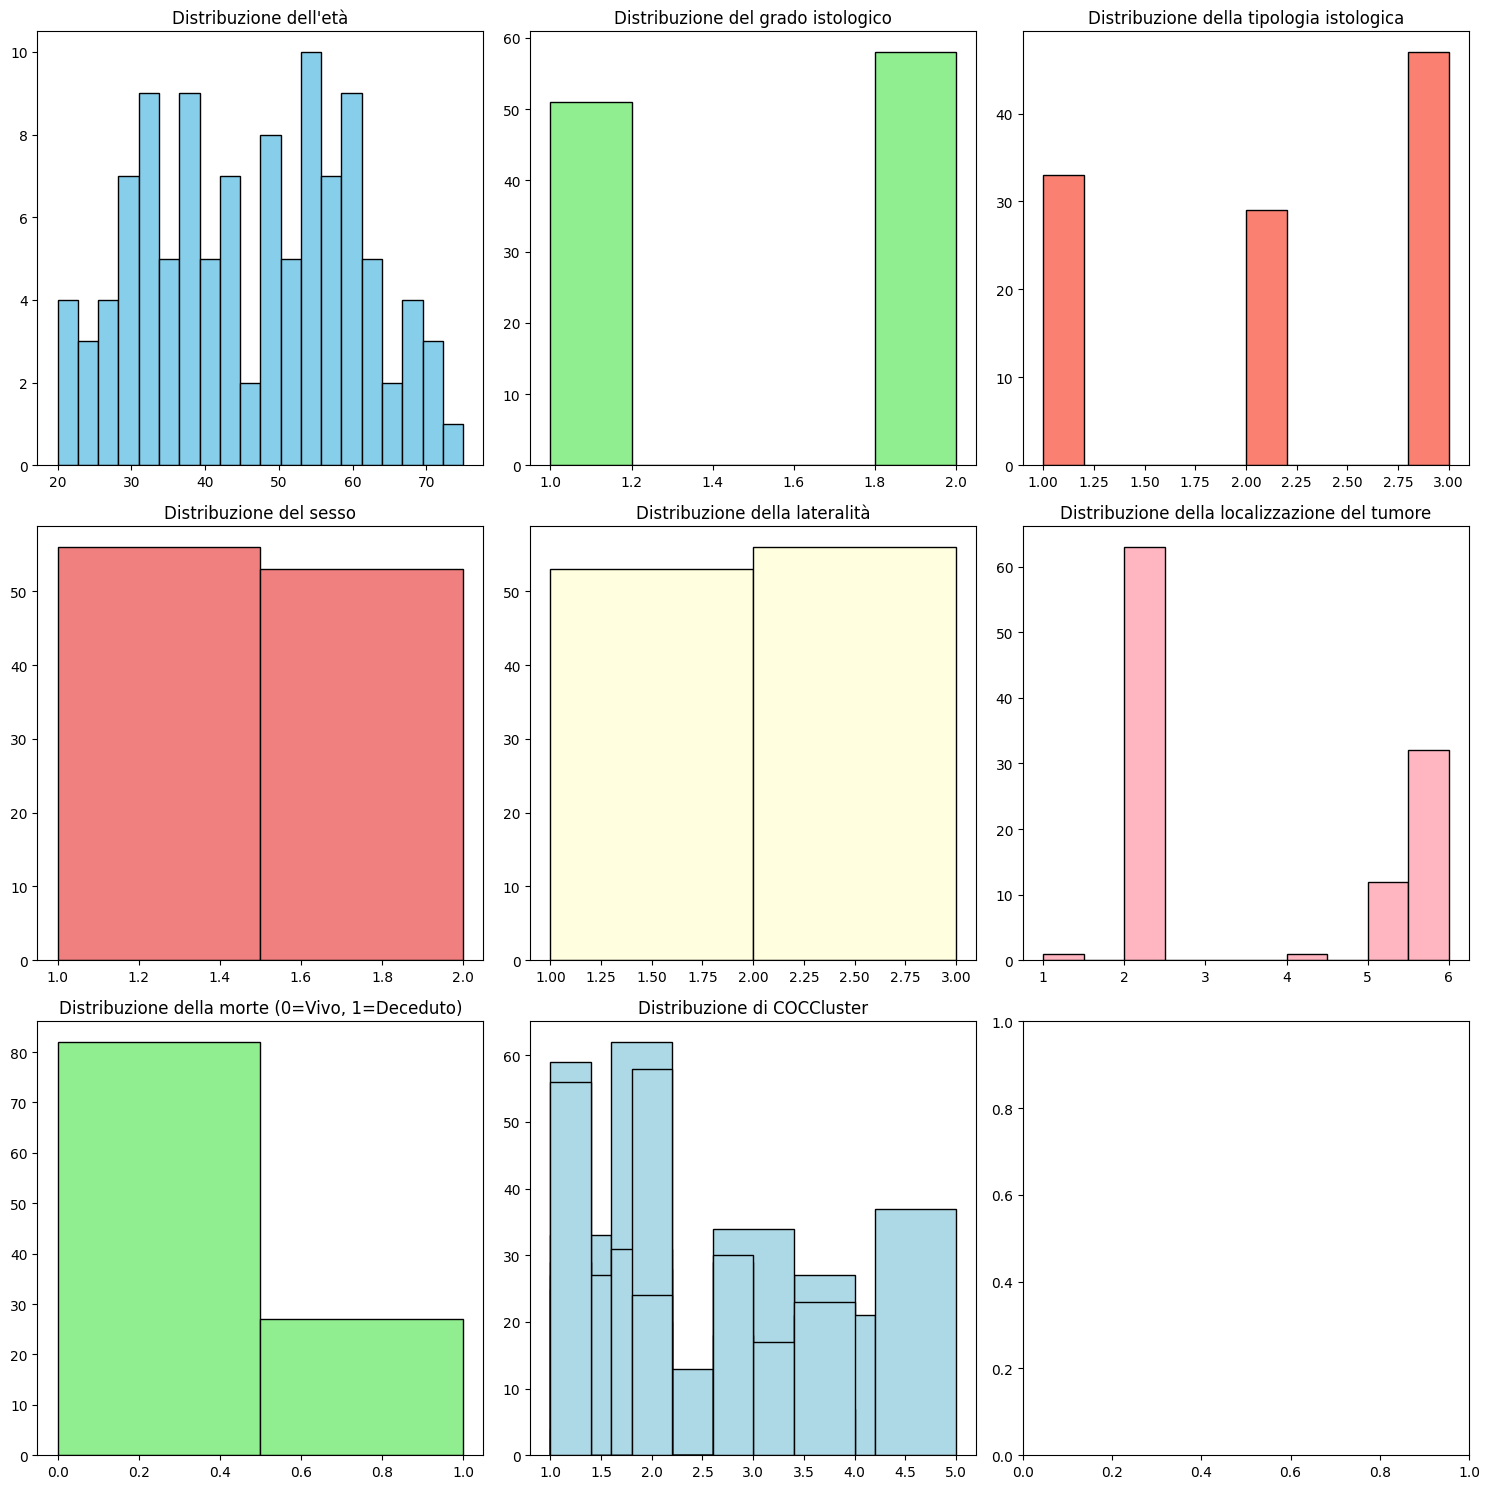

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

axes[0, 0].hist(dfUnet['age_at_initial_pathologic'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribuzione dell\'età')

axes[0, 1].hist(dfUnet['neoplasm_histologic_grade'].dropna(), bins=5, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribuzione del grado istologico')

axes[0, 2].hist(dfUnet['histological_type'].dropna(), bins=10, color='salmon', edgecolor='black')
axes[0, 2].set_title('Distribuzione della tipologia istologica')

axes[1, 0].hist(dfUnet['gender'].dropna(), bins=2, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Distribuzione del sesso')

axes[1, 1].hist(dfUnet['laterality'].dropna(), bins=2, color='lightyellow', edgecolor='black')
axes[1, 1].set_title('Distribuzione della lateralità')

axes[1, 2].hist(dfUnet['tumor_location'].dropna(), bins=10, color='lightpink', edgecolor='black')
axes[1, 2].set_title('Distribuzione della localizzazione del tumore')

axes[2, 0].hist(dfUnet['death01'].dropna(), bins=2, color='lightgreen', edgecolor='black')
axes[2, 0].set_title('Distribuzione della morte (0=Vivo, 1=Deceduto)')

clusters = ['RNASeqCluster', 'MethylationCluster', 'miRNACluster', 'CNCluster', 'RPPACluster', 'OncosignCluster', 'COCCluster']
for i, cluster in enumerate(clusters):
    ax = axes[2, 1] if i < 7 else axes[2, 2]  # Distribuisci gli istogrammi sui subplot disponibili
    ax.hist(dfUnet[cluster].dropna(), bins=5, color='lightblue', edgecolor='black')
    ax.set_title(f'Distribuzione di {cluster}')

plt.tight_layout()
plt.show()
